# Predicting heart disease using machine learning


This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

We're going to take the following approach:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition
In a statement,

Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data

The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

This is where you'll get different information about each of the features in your data. You can do this via doing your own research (such as looking at the links above) or by talking to a subject matter expert (someone who knows about the dataset).

1. age: Displays the age of the individual.

2. sex: Displays the gender of the individual using the following format : 1 = male 0 = female

3. cp- Chest-pain type: displays the type of chest-pain experienced by the individual using the following format : 0 = typical angina 1 = atypical angina 2 = non — anginal pain 3 = asymptotic

4. trestbps- Resting Blood Pressure: displays the resting blood pressure value of an individual in mmHg (unit). anything above 130-140 is typically cause for concern.

5. chol- Serum Cholestrol: displays the serum cholesterol in mg/dl (unit)

6. fbs- Fasting Blood Sugar: compares the fasting blood sugar value of an individual with 120mg/dl. If fasting blood sugar > 120mg/dl then : 1 (true) else : 0 (false) '>126' mg/dL signals diabetes

7. restecg- Resting ECG : displays resting electrocardiographic results 0 = normal 1 = having ST-T wave abnormality 2 = left ventricular hyperthrophy

8. thalach- Max heart rate achieved : displays the max heart rate achieved by an individual.

9. exang- Exercise induced angina : 1 = yes 0 = no

10. oldpeak- ST depression induced by exercise relative to rest: displays the value which is an integer or float.

11. slope- Slope of the peak exercise ST segment : 0 = upsloping: better heart rate with excercise (uncommon) 1 = flat: minimal change (typical healthy heart) 2 = downsloping: signs of unhealthy heart

12. ca- Number of major vessels (0–3) colored by flourosopy : displays the value as integer or float.

13. thal : Displays the thalassemia : 1,3 = normal 6 = fixed defect 7 = reversible defect: no proper blood movement when excercising

14. target : Displays whether the individual is suffering from heart disease or not : 1 = yes 0 = no

## Preparing tools

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score, classification_report, plot_roc_curve

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Load data

In [2]:
df = pd.read_csv('heart-disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Exploratory data analysis (EDA)

In [3]:
df.shape

(303, 14)

In [4]:
df.size

4242

In [5]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [9]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [10]:
df['target'].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot:ylabel='target'>

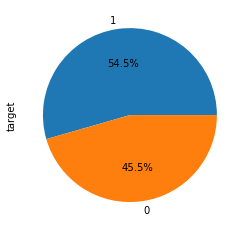

In [11]:
df['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

In this dataset, there is 165 people that have heart disease while there is 138 people that does not have heart disease

### Heart Disease Vs Gender

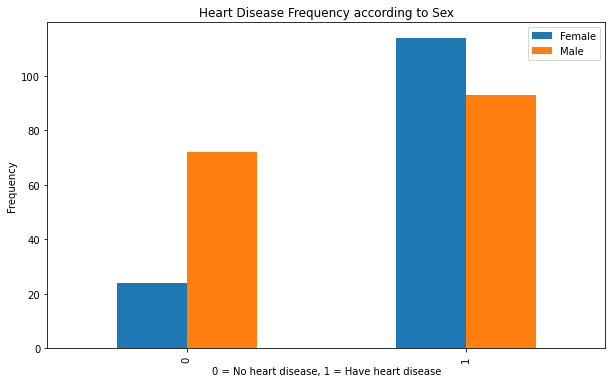

In [12]:
pd.crosstab(df['sex'],df['target']).plot(kind='bar', figsize=(10,6))

plt.title('Heart Disease Frequency according to Sex')
plt.xlabel('0 = No heart disease, 1 = Have heart disease')
plt.ylabel('Frequency')
plt.legend(['Female', 'Male']);

### Age vs Max Heart Rate for Heart Disease

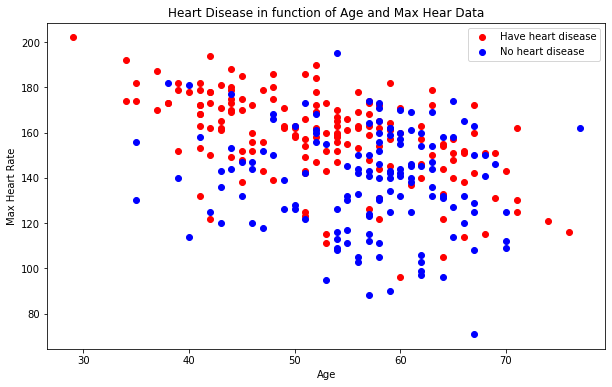

In [13]:
plt.figure(figsize=(10,6))

plt.scatter(df.age[df.target==1],
            df.thalach[df.target==1],
            c='red')

plt.scatter(df.age[df.target==0],
            df.thalach[df.target==0],
            c='blue')

plt.title('Heart Disease in function of Age and Max Hear Data')
plt.xlabel('Age')
plt.ylabel('Max Heart Rate')
plt.legend(['Have heart disease','No heart disease'])

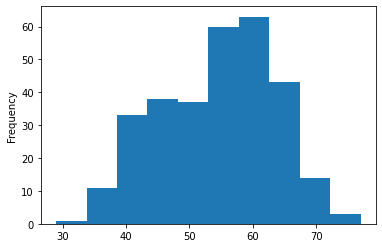

In [14]:
#Check Age distribution
df['age'].plot(kind='hist');

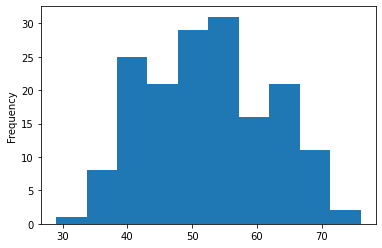

In [15]:
# Age distribution that have heart disease 
df.age[df.target==1].plot.hist();

### Heart Disease Frequency per Chest pain type

* 0 = typical angina 
* 1 = atypical angina 
* 2 = non — anginal pain 
* 3 = asymptotic


In [16]:
pd.crosstab(df['cp'],df['target'])


target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


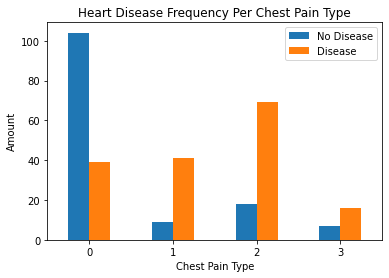

In [17]:
pd.crosstab(df['cp'],df['target']).plot(kind='bar')

plt.title('Heart Disease Frequency Per Chest Pain Type')
plt.xlabel('Chest Pain Type')
plt.ylabel('Amount')
plt.legend(['No Disease','Disease'])
plt.xticks(rotation=0);

### Correlation Analysis

In [18]:
corr_matrix = df.corr().round(2)
corr_matrix

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.00,-0.10,-0.07,0.28,0.21,0.12,-0.12,-0.40,0.10,0.21,-0.17,0.28,0.07,-0.23
sex,-0.10,1.00,-0.05,-0.06,-0.20,0.05,-0.06,-0.04,0.14,0.10,-0.03,0.12,0.21,-0.28
cp,-0.07,-0.05,1.00,0.05,-0.08,0.09,0.04,0.30,-0.39,-0.15,0.12,-0.18,-0.16,0.43
trestbps,0.28,-0.06,0.05,1.00,0.12,0.18,-0.11,-0.05,0.07,0.19,-0.12,0.10,0.06,-0.14
chol,0.21,-0.20,-0.08,0.12,1.00,0.01,-0.15,-0.01,0.07,0.05,-0.00,0.07,0.10,-0.09
fbs,0.12,0.05,0.09,0.18,0.01,1.00,-0.08,-0.01,0.03,0.01,-0.06,0.14,-0.03,-0.03
restecg,-0.12,-0.06,0.04,-0.11,-0.15,-0.08,1.00,0.04,-0.07,-0.06,0.09,-0.07,-0.01,0.14
thalach,-0.40,-0.04,0.30,-0.05,-0.01,-0.01,0.04,1.00,-0.38,-0.34,0.39,-0.21,-0.10,0.42
exang,0.10,0.14,-0.39,0.07,0.07,0.03,-0.07,-0.38,1.00,0.29,-0.26,0.12,0.21,-0.44
oldpeak,0.21,0.10,-0.15,0.19,0.05,0.01,-0.06,-0.34,0.29,1.00,-0.58,0.22,0.21,-0.43


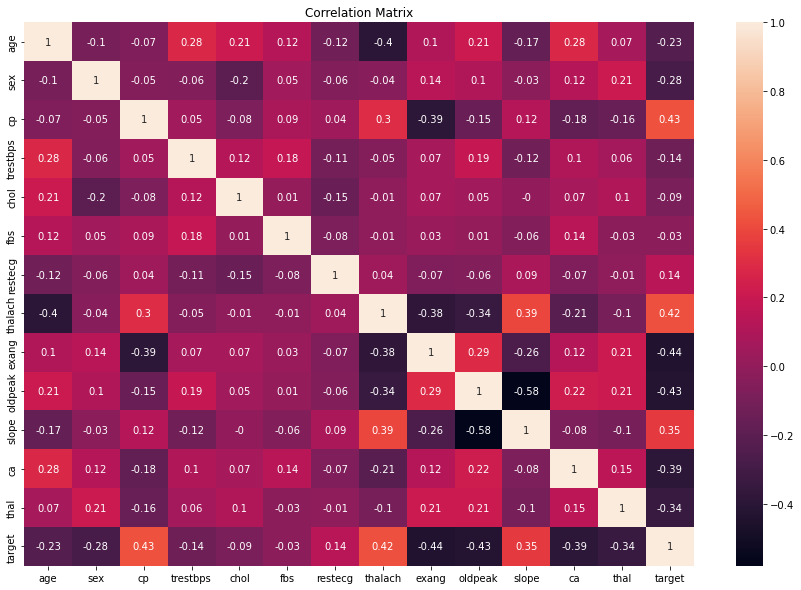

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix,
            annot=True)

plt.title('Correlation Matrix');

## 5. Modelling

In [20]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
# Split X and y
X = df.drop('target',axis=1)
y = df['target']

#split training and testing data
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [22]:
models = {
    'Logistic Regression':LogisticRegression(),
     'KNN':KNeighborsClassifier(),
     'Random Forest':RandomForestClassifier() 
         }

def fit_and_score(models,X_train,X_test,y_train,y_test):
    #set random seed
    np.random.seed(42)
    

    #make a dictionary to keep model scores
    model_scores={}
    
    #loop through models
    for name,model in models.items():
        #fit the model
        model.fit(X_train,y_train)
        #evaluate
        model_scores[name] = model.score(X_test,y_test)
    return model_scores

In [23]:
model_scores = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_scores

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8688524590163934,
 'KNN': 0.6721311475409836,
 'Random Forest': 0.8524590163934426}

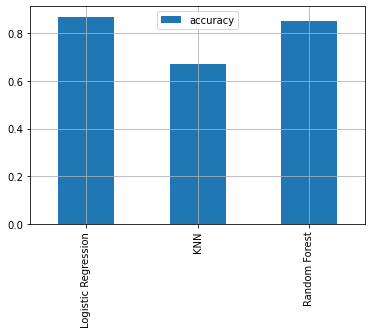

In [24]:
#model comparison

model_compare = pd.DataFrame(model_scores,index=['accuracy'])
model_compare.T.plot(kind='bar',grid=True);

Let's look at the followingL
* Hyperparameeter tuning
* Feature importance
* Confusion Matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

### Hyperparameter  tuning by hand

In [25]:
# Let's tune KNN

train_scores = []
test_scores = []

# Create a list of different values for n_neighbors

neighbors = range(1,21)

# setup KNN instance
knn = KNeighborsClassifier()

#loop through different n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors=i)
    
    #fit the model
    knn.fit(X_train,y_train)
    
    #Updata the training scores list
    train_scores.append(knn.score(X_train,y_train))
    
    #Update the testing scores list
    test_scores.append(knn.score(X_test,y_test))

In [26]:
train_scores

[1.0,
 0.7892561983471075,
 0.743801652892562,
 0.78099173553719,
 0.7644628099173554,
 0.7603305785123967,
 0.7479338842975206,
 0.743801652892562,
 0.7520661157024794,
 0.7148760330578512,
 0.7107438016528925,
 0.7024793388429752,
 0.7107438016528925,
 0.6900826446280992,
 0.6859504132231405,
 0.6818181818181818,
 0.7024793388429752,
 0.6942148760330579,
 0.6859504132231405,
 0.6818181818181818]

In [27]:
test_scores

[0.7213114754098361,
 0.6229508196721312,
 0.7049180327868853,
 0.6557377049180327,
 0.6721311475409836,
 0.639344262295082,
 0.6885245901639344,
 0.6721311475409836,
 0.7213114754098361,
 0.6557377049180327,
 0.6721311475409836,
 0.6229508196721312,
 0.6885245901639344,
 0.639344262295082,
 0.6721311475409836,
 0.7049180327868853,
 0.7049180327868853,
 0.7213114754098361,
 0.7377049180327869,
 0.7377049180327869]

0.7377049180327869


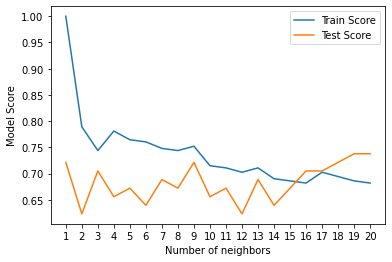

In [28]:
plt.plot(neighbors,train_scores,label='Train Score')
plt.plot(neighbors,test_scores,label='Test Score')
plt.xlabel('Number of neighbors')
plt.ylabel('Model Score')
plt.legend()
plt.xticks(np.arange(1,21,1))
print(max(test_scores))

### Hyperparameter tuning with RandomizedSearchCV

We re going to tune:
* LogisticRegression()
* RandomForestClassification()

In [29]:
# Create hyperparameter grid for LogisticRegression
log_reg_grid = {'C': np.logspace(-4,4,20),
                'solver':['liblinear']}

# Create a hyperparameter grid for RandomForestClassifier
rf_grid = {
    'n_estimators':np.arange(10,1000,50),
    'max_depth':[None,3,5,10],
    'min_samples_split':np.arange(2,20,2),
    'min_samples_leaf':np.arange(1,20,2)
}

In [30]:
# Tune the logistic regression

np.random.seed(42)

#setup random hyperparameter search Log Reg
rs_log_reg = RandomizedSearchCV(estimator = LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=3)

rs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END ........C=0.0001, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/5] END ........C=0.0001, solver=liblinear;, score=0.612 total time=   0.0s
[CV 3/5] END ........C=0.0001, solver=liblinear;, score=0.583 total time=   0.0s
[CV 4/5] END ........C=0.0001, solver=liblinear;, score=0.792 total time=   0.0s
[CV 5/5] END ........C=0.0001, solver=liblinear;, score=0.583 total time=   0.0s
[CV 1/5] END C=0.00026366508987303583, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/5] END C=0.00026366508987303583, solver=liblinear;, score=0.612 total time=   0.0s
[CV 3/5] END C=0.00026366508987303583, solver=liblinear;, score=0.604 total time=   0.0s
[CV 4/5] END C=0.00026366508987303583, solver=liblinear;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.00026366508987303583, solver=liblinear;, score=0.625 total time=   0.0s
[CV 1/5] END C=0.0006951927961775605, solver=liblinear;, score=0.673 total time=   0.0s


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=3)

In [31]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [32]:
rs_log_reg.score(X_test,y_test)

0.8688524590163934

Now, let's tune for RandomForestClassifier

In [33]:
np.random.seed(42)

rs_random_forest = RandomizedSearchCV(estimator=RandomForestClassifier(),
                                      param_distributions=rf_grid,
                                      cv=5,
                                      verbose=3,
                                      n_iter=20
                                     )
rs_random_forest.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
[CV 1/5] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.898 total time=   0.0s
[CV 2/5] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.714 total time=   0.0s
[CV 3/5] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.771 total time=   0.0s
[CV 4/5] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.812 total time=   0.0s
[CV 5/5] END max_depth=None, min_samples_leaf=9, min_samples_split=16, n_estimators=10;, score=0.875 total time=   0.0s
[CV 1/5] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510;, score=0.857 total time=   0.3s
[CV 2/5] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510;, score=0.776 total time=   0.4s
[CV 3/5] END max_depth=5, min_samples_leaf=19, min_samples_split=18, n_estimators=510;, score=0.833 

[CV 1/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=560;, score=0.857 total time=   0.4s
[CV 2/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=560;, score=0.776 total time=   0.4s
[CV 3/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=560;, score=0.854 total time=   0.4s
[CV 4/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=560;, score=0.812 total time=   0.4s
[CV 5/5] END max_depth=3, min_samples_leaf=15, min_samples_split=12, n_estimators=560;, score=0.896 total time=   0.4s
[CV 1/5] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960;, score=0.857 total time=   0.7s
[CV 2/5] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960;, score=0.796 total time=   0.7s
[CV 3/5] END max_depth=3, min_samples_leaf=13, min_samples_split=4, n_estimators=960;, score=0.833 total time=   0.8s
[CV 4/5] END max_depth=3, min_samples_leaf=13, min_

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=3)

In [34]:
rs_random_forest.best_params_

{'n_estimators': 560,
 'min_samples_split': 12,
 'min_samples_leaf': 15,
 'max_depth': 3}

In [35]:
rs_random_forest.score(X_test,y_test)

0.8688524590163934

### Hyperparameter tuning with GridSearchCV

In [36]:
# Different hyperparamete for our logistic Regression
from sklearn.model_selection import GridSearchCV

log_reg_grid = {
    'C':np.logspace(-4,4,30),
    'solver':['liblinear']
}

gs_log_reg = GridSearchCV(estimator=LogisticRegression(),
                         param_grid=log_reg_grid,
                         cv=5,
                         verbose=3,
                         )

gs_log_reg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV 1/5] END ........C=0.0001, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/5] END ........C=0.0001, solver=liblinear;, score=0.612 total time=   0.0s
[CV 3/5] END ........C=0.0001, solver=liblinear;, score=0.583 total time=   0.0s
[CV 4/5] END ........C=0.0001, solver=liblinear;, score=0.792 total time=   0.0s
[CV 5/5] END ........C=0.0001, solver=liblinear;, score=0.583 total time=   0.0s
[CV 1/5] END C=0.00018873918221350977, solver=liblinear;, score=0.653 total time=   0.0s
[CV 2/5] END C=0.00018873918221350977, solver=liblinear;, score=0.633 total time=   0.0s
[CV 3/5] END C=0.00018873918221350977, solver=liblinear;, score=0.604 total time=   0.0s
[CV 4/5] END C=0.00018873918221350977, solver=liblinear;, score=0.812 total time=   0.0s
[CV 5/5] END C=0.00018873918221350977, solver=liblinear;, score=0.604 total time=   0.0s
[CV 1/5] END C=0.0003562247890262444, solver=liblinear;, score=0.653 total time=   0.0s


[CV 1/5] END C=221.22162910704503, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=221.22162910704503, solver=liblinear;, score=0.816 total time=   0.0s
[CV 3/5] END C=221.22162910704503, solver=liblinear;, score=0.771 total time=   0.0s
[CV 4/5] END C=221.22162910704503, solver=liblinear;, score=0.812 total time=   0.0s
[CV 5/5] END C=221.22162910704503, solver=liblinear;, score=0.833 total time=   0.0s
[CV 1/5] END C=417.53189365604004, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=417.53189365604004, solver=liblinear;, score=0.816 total time=   0.0s
[CV 3/5] END C=417.53189365604004, solver=liblinear;, score=0.771 total time=   0.0s
[CV 4/5] END C=417.53189365604004, solver=liblinear;, score=0.812 total time=   0.0s
[CV 5/5] END C=417.53189365604004, solver=liblinear;, score=0.833 total time=   0.0s
[CV 1/5] END C=788.0462815669904, solver=liblinear;, score=0.857 total time=   0.0s
[CV 2/5] END C=788.0462815669904, solver=liblinear;, score=0.816 t

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=3)

In [37]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [38]:
gs_log_reg.score(X_test,y_test)

0.8524590163934426

### Evaluation beyond accuracy

* ROC curve and AUC score
* confusion matrix
* Classification report
* Precision
* Recall
* F1 score

To make comparisons and evaluate our evaluate model, first we need to make predictions

In [39]:
y_preds = gs_log_reg.predict(X_test)
y_preds

array([1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


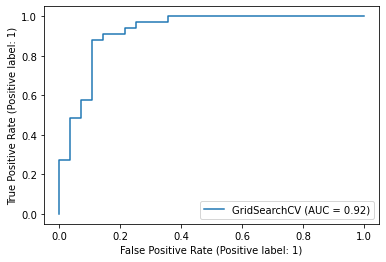

In [40]:
# Plot ROC curve and calculate AUC metric

plot_roc_curve(gs_log_reg,X_test,y_test);

In [41]:
#Confusion Matrix
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_preds))

[[22  6]
 [ 3 30]]


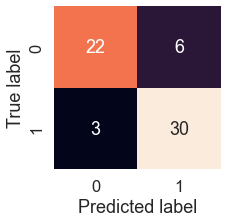

In [42]:
sns.set(font_scale=1.5)

def plot_conf_mat(y_test,y_preds):
    
    fig , ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')
    
plot_conf_mat(y_test,y_preds)

Classification report as well as cross-validated precision, recall and f1-score

In [43]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.88      0.79      0.83        28
           1       0.83      0.91      0.87        33

    accuracy                           0.85        61
   macro avg       0.86      0.85      0.85        61
weighted avg       0.85      0.85      0.85        61



### Calculate evaluation metrcis usign cross-validation


In [44]:
gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [45]:
#create a new classifier wiht the best 
np.random.seed(42)
from sklearn.model_selection import cross_val_score

model = LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [46]:
#Cross validated accuracy
cv_acc = np.mean(cross_val_score(model,X,y,cv=5,scoring=None))

In [47]:
# Cross validated precision
cv_precision = np.mean(cross_val_score(model,X,y,cv=5,scoring='precision'))

In [48]:
# Cross validated recall
cv_recall = np.mean(cross_val_score(model,X,y,scoring='recall',cv=5))

In [49]:
# Cross validated f1-score
cv_f1 = np.mean(cross_val_score(model,X,y,scoring='f1',cv=5))

In [50]:
cv_metrics = pd.DataFrame({'Accuracy':cv_acc,
                          'Precision':cv_precision,
                           'Recall':cv_recall,
                           'F1 Score':cv_f1
                          }, index=[0])
cv_metrics.T

,0
Accuracy,0.838087
Precision,0.815467
Recall,0.915152
F1 Score,0.861485


Text(0.5, 1.0, 'Cross Validated Metrics Score')

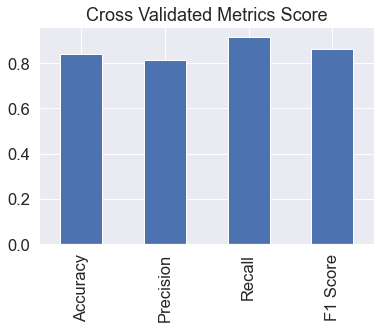

In [51]:
cv_metrics.T.plot.bar(legend=False)
plt.title('Cross Validated Metrics Score')


### Feature importance

Feature importance is another as asking "which features contributed most to the outcomes of the model and how did they contribute

Finding feature importance is different for each machine learning model

In [52]:
#Feature importance of Log_Regression

gs_log_reg.best_params_

{'C': 0.38566204211634725, 'solver': 'liblinear'}

In [53]:
model = LogisticRegression(C=0.38566204211634725,solver='liblinear')

In [54]:
model.fit(X_train,y_train)

LogisticRegression(C=0.38566204211634725, solver='liblinear')

In [55]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [56]:
#check coef
model.coef_

array([[ 8.84806484e-03, -1.07764306e+00,  8.99676456e-01,
        -1.56060330e-02, -1.25815509e-04, -7.53608891e-02,
         4.13713688e-01,  2.36613668e-02, -6.63497661e-01,
        -5.24577066e-01,  4.27324968e-01, -6.32052170e-01,
        -7.13324239e-01]])

In [57]:
#Match coef's of features to columns
feature_dict = dict(zip(df.columns,list(model.coef_[0])))
feature_dict

{'age': 0.0088480648417672,
 'sex': -1.077643061358959,
 'cp': 0.8996764555420237,
 'trestbps': -0.015606032978797814,
 'chol': -0.00012581550855692827,
 'fbs': -0.07536088905831702,
 'restecg': 0.41371368826813126,
 'thalach': 0.02366136679725514,
 'exang': -0.6634976606830292,
 'oldpeak': -0.5245770660710152,
 'slope': 0.4273249675037609,
 'ca': -0.6320521697757744,
 'thal': -0.71332423903951}

In [58]:
#Visualize feature importance
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T

,0
age,0.008848
sex,-1.077643
cp,0.899676
trestbps,-0.015606
chol,-0.000126
fbs,-0.075361
restecg,0.413714
thalach,0.023661
exang,-0.663498
oldpeak,-0.524577


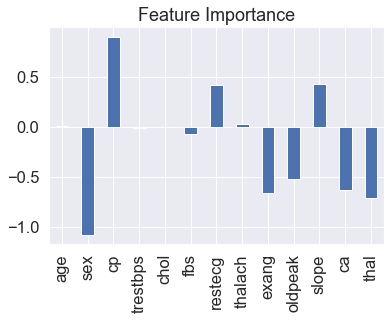

In [60]:
feature_df.T.plot.bar(legend=False)
plt.title('Feature Importance');